## NYC Airbnb Data Exploration

## Table of Contents
- [Introduction](#intro)
- [Assess](#assess)
- [Clean](#clean)
- [Visualization](#visualization)
- [Conclusions](#conclusions)


<a id='intro'></a>
## Introduction

Since 2008, hosts and guests have used Airbnb to explore the possibilities of travelling around the world. People started to use this platform increasingly frequent, thus generating a ton of data. We can utilize the data generated to gain insight into the behavior of customers and hosts. Analyzing the data is a crucial part for Airbnb, which helps to drive business growth, guide marketing initiatives, and implement additional innovative services. 

In [54]:
# import all libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import zipfile
import os
%matplotlib inline

In [55]:
# extract all data from zipfile downloaded from Kaggle
#with zipfile.ZipFile('new-york-city-airbnb-open-data.zip','r') as file:
 #   file.extractall()

In [56]:
# check 
os.listdir()

['.DS_Store',
 'output_toggle.tpl',
 'New_York_City_.png',
 'new-york-city-airbnb-open-data.zip',
 'New York City Airbnb Data Wrangling and Visualization.slides.html',
 'New York City Airbnb Data Wrangling and Visualization.ipynb',
 'New York City Airbnb Data Exploration .ipynb',
 '.ipynb_checkpoints',
 '.git',
 'AB_NYC_2019_new.csv',
 'AB_NYC_2019.csv']

<a id='assess'></a>
## Assess

In [57]:
# import csv file into notebook and view the first a few rows
listing = pd.read_csv('AB_NYC_2019.csv')
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [58]:
# checking amount of rows in this dataset to understand the size we are working with
len(listing)

48895

In [59]:
# last a few rows
listing.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [60]:
# check the properties of columns
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

By calling info() function, we found a few columns with missing values: `name`, `host_name`, `last_review`,`reviews_per_month`. Among those variables, `name` and `host_name` do not require further cleaning and handling. 

In [61]:
# Sample a few records 
listing.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4239,2789713,New- Downtown Brooklyn Apt- 10 min Manhattan,14269155,Stephen,Brooklyn,Boerum Hill,40.68671,-73.98952,Entire home/apt,160,5,0,NaN,NaN,1,24
27381,21597684,Room on st marks place (women only),2326551,Laura,Manhattan,East Village,40.72625,-73.98404,Private room,80,1,10,2019-05-07,0.52,2,97
16577,13276288,"BR in huge old Bushwick loft, brick, private roof",2723661,Caitlin,Brooklyn,Bushwick,40.69415,-73.92987,Private room,45,1,0,NaN,NaN,1,0
4471,3068047,Upper East Side Steal,15613241,Courtney,Manhattan,Upper East Side,40.78145,-73.95588,Entire home/apt,250,3,3,2015-10-11,0.06,1,0
29355,22514949,"Bright, cozy room in UWS next to Central Park",59385671,Yiran,Manhattan,Upper West Side,40.80055,-73.96078,Private room,54,3,0,NaN,NaN,1,0


In [62]:
# summarize statistics for numeric variables
listing[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [63]:
# inspect the listing whose minimum_nights is 1250
listing[listing.minimum_nights == 1250]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365


In [64]:
# see how many room types do we have
listing.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [65]:
# see how many neighbourhood groups
listing.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

- `name`,`host_name`, `last_review` are not necessary columns
- `neighbourhood_group`,`neighbourhood`,`room_type` should be categorical data
- `reviews_per_month` has more than 10,000 null values
- listings with price as 0 should not exist

<a id='clean'></a>
## Clean
#### Define
- Drop all unnecessary columns (`name`,`host_name`, `last_review`)
- Change data types for `neighbourhood_group`,`neighbourhood`,`room_type` to categorical data
- Fill all NA values in `reviews_per_month` as 0
- Drop all listings with price as 0

#### Code

In [66]:
# create a copied dataframe for listing
listings = listing.copy()

In [67]:
# drop unwanted columns
listings.drop(['name','host_name', 'last_review'], axis=1,inplace=True)

In [68]:
# change data types for specified columns from 'object' to 'categorical'
listings[['neighbourhood_group','neighbourhood','room_type']] = listings[['neighbourhood_group','neighbourhood','room_type']].astype('category')

In [69]:
# fill NA values in reviews_per_month as 0
listings['reviews_per_month'].fillna(0,inplace = True)

In [70]:
# drop all listings of price 0
listings.drop(listings[listings['price'] == 0].index.values, axis = 0,inplace=True)

#### Test

In [71]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 13 columns):
id                                48884 non-null int64
host_id                           48884 non-null int64
neighbourhood_group               48884 non-null category
neighbourhood                     48884 non-null category
latitude                          48884 non-null float64
longitude                         48884 non-null float64
room_type                         48884 non-null category
price                             48884 non-null int64
minimum_nights                    48884 non-null int64
number_of_reviews                 48884 non-null int64
reviews_per_month                 48884 non-null float64
calculated_host_listings_count    48884 non-null int64
availability_365                  48884 non-null int64
dtypes: category(3), float64(3), int64(7)
memory usage: 4.3 MB


Through the wrangling steps, we understand that we are dealing with a dataset with around 50,000 observations and 13 columns. Now the cleaned dataset doesn't have missing values, and users' sensitive values have been removed. We are ready to move to next chapter: data visualization.

In [84]:
# Save the data to a new csv for further visualizations
listings.to_csv('AB_NYC_2019_new.csv', index=False)

<a id='visualization'></a>
## Visualizing data

Looking into the nature of data, we have a mix of categorical and numeric data. To get started, we can conduct univariate analysis first. 

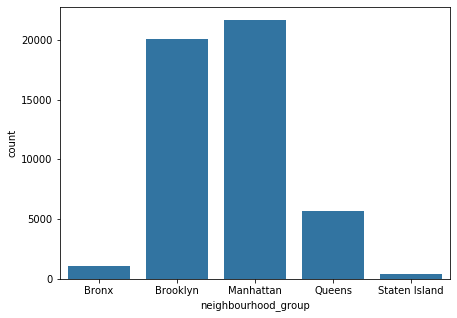

In [73]:
# plot countplot for neighbourhood group
plt.figure(figsize=(7,5))
color_base = sb.color_palette()[0]
sb.countplot(data=listings, x='neighbourhood_group',color=color_base);

Nice, we now have an idea on the total listing distribution on neighbourhood groups. Manhattan takes the highest total listings, followed by Brooklyn. The total listing is more than 20,000 for Manhattan, and is around 20,000 for Brooklyn. Queens' listings number ranks third, but it's significantly much lower than the previous 2. 

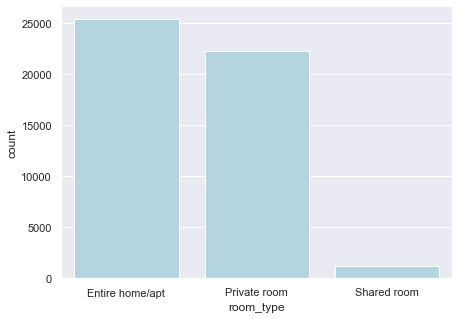

In [74]:
# plot countplot for neighbourhood group
plt.figure(figsize=(7,5))
sb.set()
color_base = sb.color_palette()[0]
sb.countplot(data=listings, x='room_type',color='lightblue');

Looking at total listings by room type, `Entire home/apt` is the most common one. Think about yourself, do we prefer living in a private space when travelling or sharing with strangers? 

In [75]:
# plot the countplot for top 10 popular neighbourhoods
top10_neighbour_name = listings.neighbourhood.value_counts().index.values[:10]
top10_neighbour = listings[listings['neighbourhood'].isin(top10_neighbour_name)].neighbourhood.astype(str)

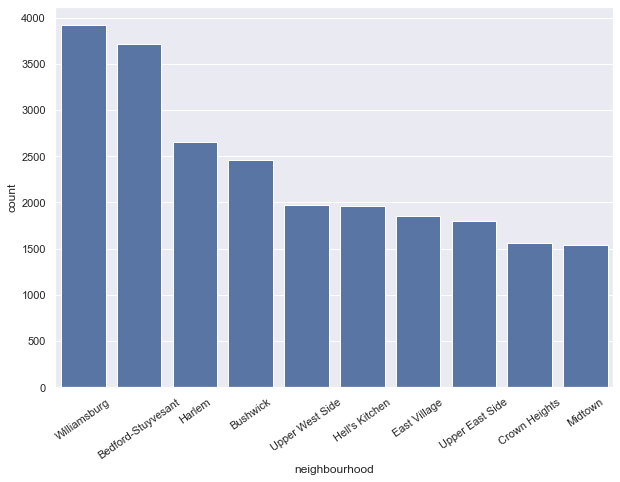

In [76]:
# plot the counts by neighbourhood for top 10 popular neighbourhoods
plt.figure(figsize=(10,7))
color_base1 = sb.color_palette()[0]
sb.countplot(top10_neighbour,order=top10_neighbour_name,color=color_base1)
plt.xticks(rotation = 35);

More detailed investigation on top 10 most popular neighbourhoods is shown above. Williamsburg takes on the highest listing counts. 

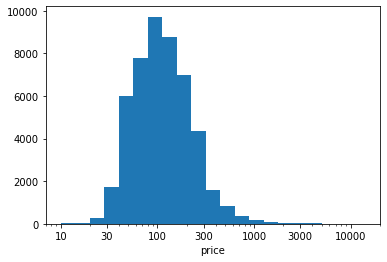

In [77]:
# plot the histograms for numeric interested variables
plt.figure(figsize = (6,4))
sb.reset_defaults()
bins = 10**np.arange(1, np.log10(listings['price'].max())+0.15,0.15)
plt.hist(data=listings, x='price',bins=bins)
plt.xscale('log')
tick_locs = [10,30,100,300,1000,3000,10000]
plt.xticks(tick_locs,tick_locs)
plt.xlabel('price',fontsize=10);

Great! Price is always the one metric that probably requires 'log' treatment since it always show a long tail on the right. After the log transformation, we can tell that the most common price is around 100 dollars/night. 

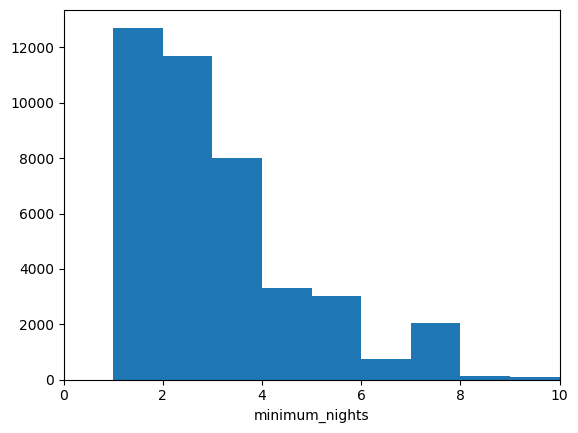

In [78]:
# Plot histogram of minimum nights 
bins = np.arange(1,listings['minimum_nights'].max()+1, 1)
plt.hist(data=listings,x='minimum_nights',bins=bins)
plt.xlim(0,10)
plt.xlabel('minimum_nights');

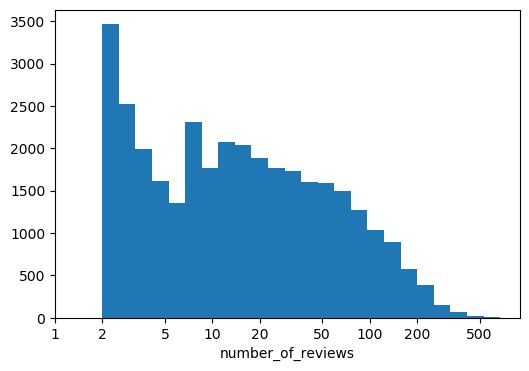

In [79]:
# plot histogram of number_of_reviews
plt.figure(figsize = (6,4))
bins = 2**np.arange(1, np.log2(listings['number_of_reviews'].max())+0.35,0.35)
plt.hist(data=listings, x='number_of_reviews',bins=bins)
plt.xscale('log',basex=2)
tick_locs = [1,2,5,10,20,50,100,200,500]
plt.xticks(tick_locs,tick_locs)
plt.xlabel('number_of_reviews',fontsize=10);

Minimum nights gives us 1-2 as the most frequent values. For number_of_reviews, we see a bimodal pattern after log transformation. They are 2-3 and 8-10.

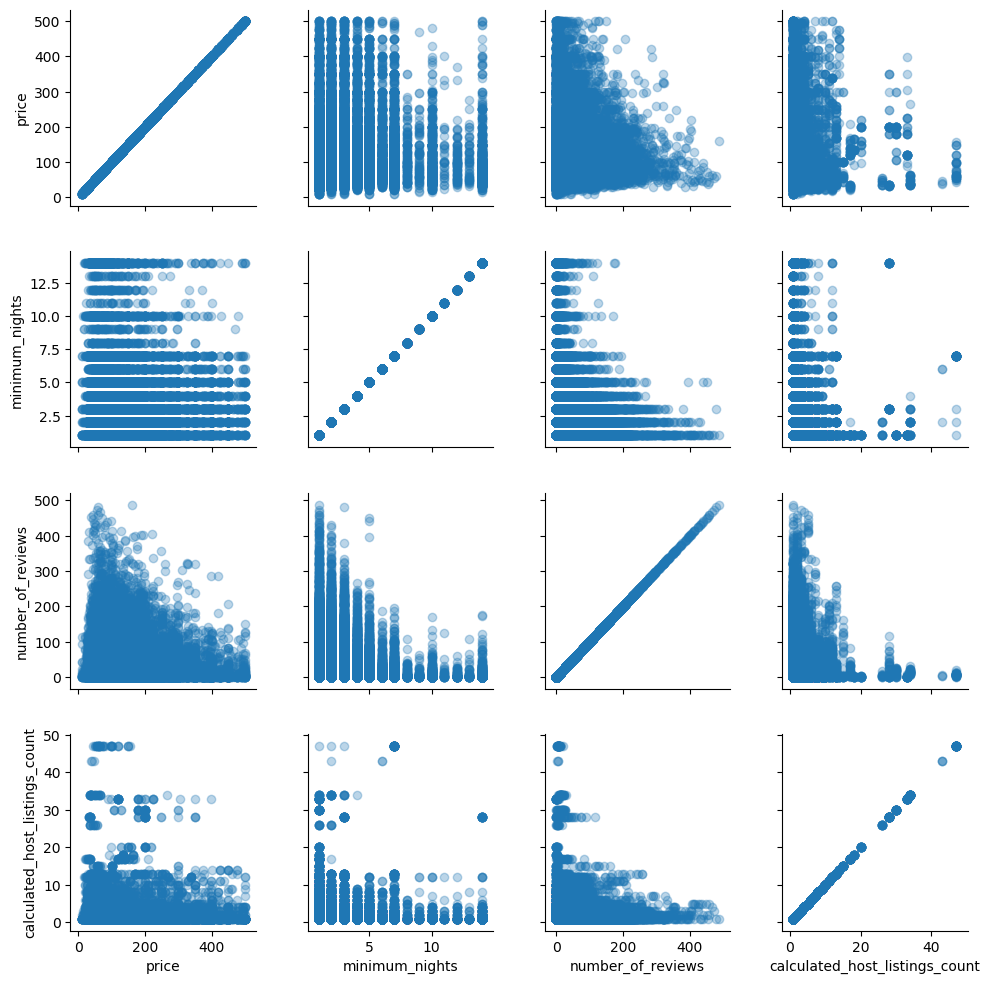

In [80]:
# Plot a scatter matrix among different numeric variables, focus only on most common values
listings_matrix = listings[(listings['price'] < 500) & (listings['minimum_nights'] < 15) & (listings['number_of_reviews'] < 500)
                          & (listings['calculated_host_listings_count'] < 80)]
numeric_vars = ['price','minimum_nights','number_of_reviews','calculated_host_listings_count']
g = sb.PairGrid(data=listings_matrix, vars=numeric_vars)
g.map(plt.scatter,alpha=0.3);
#plt.yscale('log');

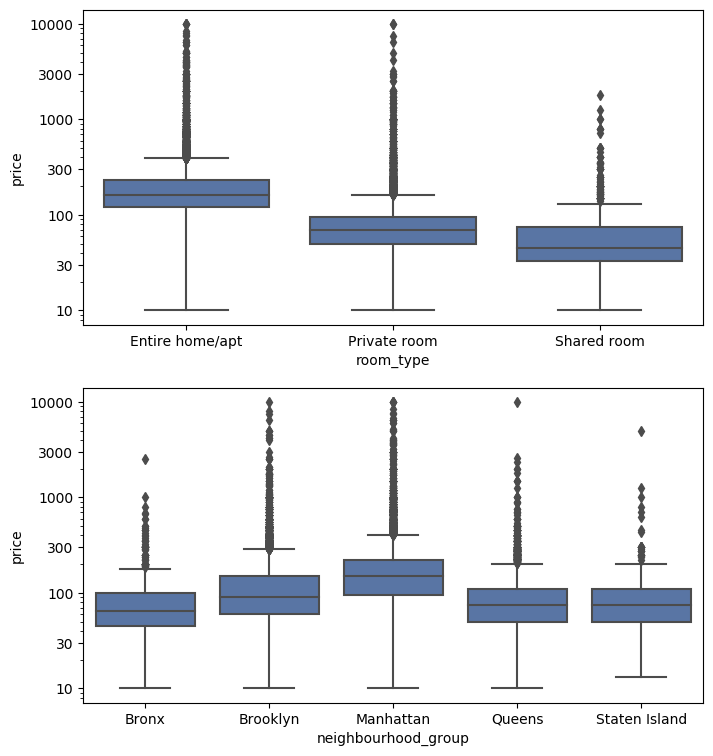

In [81]:
# plot price by room type and neighbourhood_group
room_neighbour = ['room_type','neighbourhood_group']
fig, ax = plt.subplots(nrows=2, figsize=(8,9))

for i in range(2):
    sb.boxplot(data=listings, x=room_neighbour[i],y='price',color=color_base, ax=ax[i])
    ax[i].set_yscale('log')
    tick_locs = [10,30,100,300,1000,3000,10000]
    ax[i].set_yticks(tick_locs)
    ax[i].set_yticklabels(tick_locs);

Fantastic! It's no secret that Manhattan is the more expensive place to live! See conclusions below:
- From the boxplots above, we can see that Entire home/apt takes the highest price compared to the other two categories. No wonder that Shared room takes the lowest price
- Manhattan's median price is the highest which is in line with the level of prosperity

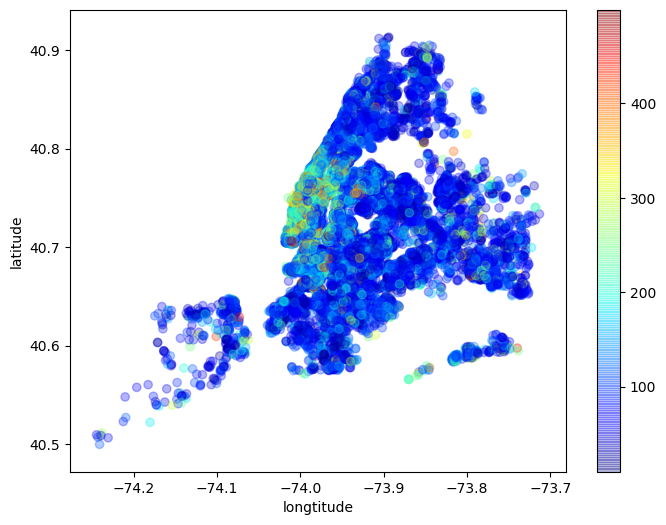

In [82]:
# plot price by longtitude and latitude
plt.figure(figsize=(8,6))

listings_less500 = listings[listings.price < 500]
plt.scatter(data=listings_less500,x='longitude', y='latitude', c='price', alpha=0.3,cmap='jet');
plt.colorbar()
plt.xlabel('longtitude')
plt.ylabel('latitude');

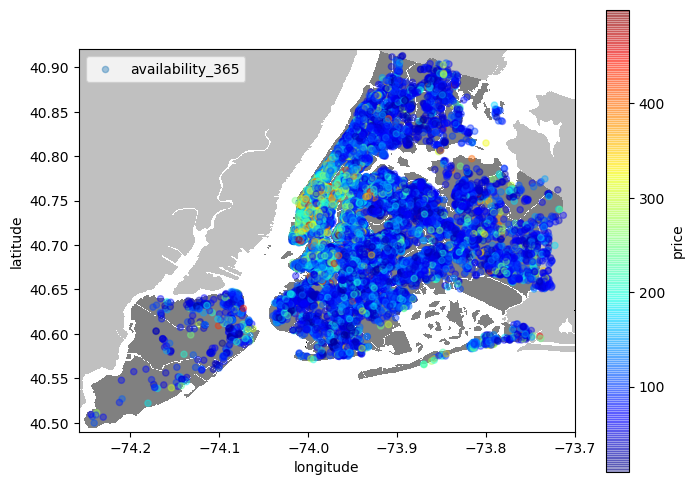

In [83]:
import urllib
#initializing the figure size
plt.figure(figsize=(8,6))

#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

#using scatterplot again
listings_less500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

Having longtitude and latitude at hand is a great opportunity for us to explore data on a map. This resonates with our real-life experience.   

I fetched a map from wikipedia and layer the scatterplots onto the map. Now we can see the most expensive areas to live on NYC map to get an idea about how the prices vary by geo.

<a id='conclusions'></a>
## Conclusions

This dataset for Airbnb 2019 NYC listings is very rich and informative. We first cleaned to dataset by dealing with all missing values and dropping unnecessary columns. Then we performed a few data visualizations from univariate to multivariate. Below are the conclusions we can draw from the analysis above:

- Manhattan takes the highest total listings, followed by Brooklyn. The total listing is more than 20,000 for Manhattan, and is around 20,000 for Brooklyn.
- We can tell that the most common price is around 100 dollars/night.
- Minimum nights gives us 1-2 as the most frequent values. For number_of_reviews, we see a bimodal pattern after log transformation. They are 2-3 and 8-10.
- Entire home/apt takes the highest price compared to the other two categories. 
- Manhattan's median price is the highest which is in line with the level of prosperity.